## FCC Comments on Net Neutrality
### Natural Language Processing and Multinomial Naive Bayes model
### Dimitri Kourouniotis

In [100]:
#import
import pandas as pd

In [101]:
#Read in Dataset
df = pd.read_csv('FCC_US_commentstext_datefreq.csv',encoding = 'latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
df.head(2)

,State_Abbreviation,id,date_submission,contact_email,index,renamed_text_data,internationaladdressentity,filers,intl_fake_zip,date_test,freq_time,text_data,comment_text
0,IA,59f8b2bb50b733300f069dce,2017-07-11T15:53:55.588Z,LINDAKUNZE88@GMAIL.COM,filings.2017.7,NaN,NaN,"[{""name"":""Linda Kunze""}]",NaN,2017-07-11 15:53:55,12,The unprecedented regulatory power the Obama A...,The unprecedented regulatory power the Obama A...
1,RI,59f8b2bb50b733300f069dd1,2017-07-11T15:53:55.750Z,TD3ONE@GMAIL.COM,filings.2017.7,NaN,NaN,"[{""name"":""Thomas Daniels""}]",NaN,2017-07-11 15:53:55,12,The unprecedented regulatory power the Obama A...,The unprecedented regulatory power the Obama A...


### 400 labeled records marked with Fake or True 

In [104]:
#import classifed data set
data = pd.read_csv('FCC_df_zip_400model.csv')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
id                            400 non-null object
date_submission               400 non-null object
contact_email                 389 non-null object
confirmation_number           400 non-null float64
text_data                     397 non-null object
index                         400 non-null object
filers                        400 non-null object
addressentity                 400 non-null object
internationaladdressentity    400 non-null object
address_line_1                400 non-null object
city                          400 non-null object
state                         400 non-null object
zip_code                      400 non-null object
international_address_text    0 non-null float64
fake                          400 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 47.0+ KB


In [118]:
#explore concatonated graded data
data.head(2)

,id,date_submission,contact_email,confirmation_number,comment_text,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text,fake,date_test,intl_fake_zip,model
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,2.020000e+17,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...",{'addresstext': ''},133 Blendon Rd,W Jefferson,OH,43162,NaN,1,2017-05-24 22:58:31,0,1
1,59f883d850b733300fdbec7b,2017-05-24T22:58:31+00:00,dseanger@msn.com,2.020000e+17,Chairman Pai: My comments re: net neutrality ...,filings.2017.5,"[{""name"":""Douglas Seanger""}]","{'city': 'Tucson', 'address_line_1': '1650 E R...",{'addresstext': ''},1650 E River Rd Ste 104,Tucson,AZ,56303,NaN,1,2017-05-24 22:58:31,0,1


In [119]:
# rename text_data column
data=data.rename(columns = {'text_data':'comment_text'})

In [120]:
data['date_test']= pd.to_datetime(data['date_submission'])
data['date_test']= data['date_test'].values.astype('datetime64[s]')

In [121]:
#add intl fake zip column to match full dataset (where zip code was extracted from suspicious address)
data['intl_fake_zip']=0

In [122]:
#add model column 
data['model']=1

In [123]:
data.columns

Index(['id', 'date_submission', 'contact_email', 'confirmation_number',
       'comment_text', 'index', 'filers', 'addressentity',
       'internationaladdressentity', 'address_line_1', 'city', 'state',
       'zip_code', 'international_address_text', 'fake', 'date_test',
       'intl_fake_zip', 'model'],
      dtype='object')

In [112]:
model_df = data[['id', 'contact_email','comment_text', 'filers', 'internationaladdressentity', 'fake', 'date_test','intl_fake_zip', 'model']]

In [124]:
model_df.head(2)

,id,contact_email,comment_text,filers,internationaladdressentity,fake,date_test,intl_fake_zip,model
0,59f883d850b733300fdbec7a,amos31wj@yahoo.com,"Dear Chairman Pai, I'm contacting you about r...","[{""name"":""Amos Thompson""}]",{'addresstext': ''},1,2017-05-24 22:58:31,0,1
1,59f883d850b733300fdbec7b,dseanger@msn.com,Chairman Pai: My comments re: net neutrality ...,"[{""name"":""Douglas Seanger""}]",{'addresstext': ''},1,2017-05-24 22:58:31,0,1


<div class="span5 alert alert-info">
<h3>NLP section<h3> </div>

In [126]:
import nltk

In [127]:
print(len(model_df))

400


In [128]:
model_df['comment_text'][35]

"Dear FCC,  I want to give my opinion on the FCC's so-called Open Internet order. I'd like to suggest the commissioners to repeal The previous administration's power grab to take over broadband. People like me, as opposed to Washington bureaucrats, ought to use the services we desire. The previous administration's power grab to take over broadband is a distortion of the open Internet. It reversed a pro-consumer approach that functioned remarkably well for a long time with both parties' approval."

In [130]:
model_df.groupby('fake').describe()

intl_fake_zip                                     model                 \
             count mean  std  min  25%  50%  75%  max  count mean  std  min   
fake                                                                          
0            107.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  107.0  1.0  0.0  1.0   
1            293.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  293.0  1.0  0.0  1.0   

                          
      25%  50%  75%  max  
fake                      
0     1.0  1.0  1.0  1.0  
1     1.0  1.0  1.0  1.0

In [131]:
#some comments are not text but floats
model_df['comment_text'] = model_df['comment_text'].astype(str)

In [132]:
model_df['length']=model_df['comment_text'].apply(len)

In [133]:
model_df[['comment_text','length']].head(2)

,comment_text,length
0,"Dear Chairman Pai, I'm contacting you about r...",437
1,Chairman Pai: My comments re: net neutrality ...,454


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

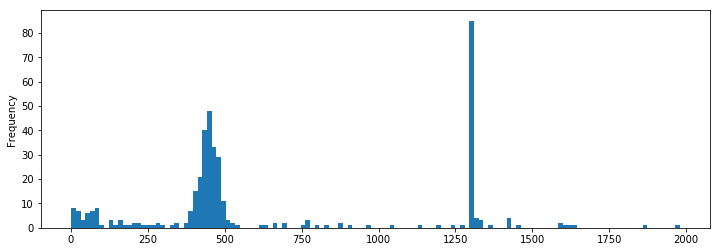

In [135]:
model_df['length'].plot.hist(bins=130,figsize=(12,4))

In [136]:
model_df['length'].describe()

count     400.000000
mean      651.345000
std       447.029938
min         1.000000
25%       425.000000
50%       460.000000
75%      1300.000000
max      1980.000000
Name: length, dtype: float64

In [137]:
model_df['length'].value_counts().head()

1300    82
451     10
442      8
431      6
480      6
Name: length, dtype: int64

In [138]:
#inspect the 82 messages that have length 1300
model_df[model_df['length']==1300]['comment_text'].iloc[0]

'The FCC needs to stand up for Internet users like me and keep the net neutrality rules that are already in effect. \r\r\r\n\r\r\r\nThe FCC should throw out Chairman Ajit Pai?s proposal to hand the government-subsidized ISP monopolies like Verizon, Comcast, and AT&amp;T the legal cover to create Internet fast lanes, stripping Internet users of the vital privacy and access safeguards we worked for and so recently won. \r\r\r\n\r\r\r\nI?m afraid of a ?pay-to-play? Internet where ISPs can charge more for certain websites because 3. Thankfully, the existing Open Internet rules mean that ISP monopolies can?t slow or block consumers? ability to see certain web services or engage in data discrimination by charging online services and websites more money to reach people faster. That?s the right kind of forward-looking approach to make sure competition in the Internet space is fair and benefits small businesses and Internet users as well as entrenched Internet companies. Chairman Pai?s proposed

In [142]:
#inspect the 82 messages that have length 1300
#they come from 'netsparker@example.com', all have the identical text, the name Smith and were all submitted withing 30' of each other?
model_df[model_df['length']==1300].iloc[:2]

,id,contact_email,comment_text,filers,internationaladdressentity,fake,date_test,intl_fake_zip,model,length
101,59f8884750b733300fe0dc7e,netsparker@example.com,The FCC needs to stand up for Internet users l...,"[{""name"":""\nnetsparker(0x000A32);""}]",{'addresstext': ''},1,2017-05-25 01:33:40,0,1,1300
102,59f8884750b733300fe0dc80,netsparker@example.com,The FCC needs to stand up for Internet users l...,"[{""name"":""http://r87.com/?dearfcc.org/""}]",{'addresstext': ''},1,2017-05-25 01:33:41,0,1,1300


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D88313AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021D88478828>], dtype=object)

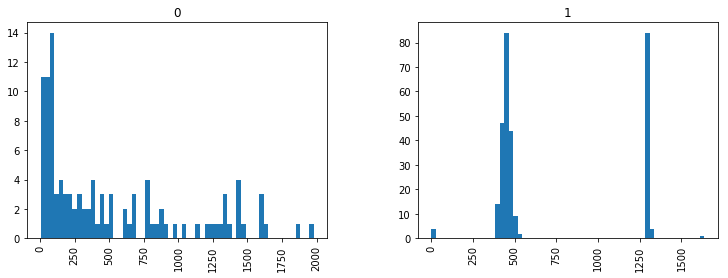

In [195]:
#looking at the distribution of fake vs real
model_df.hist(column='length',by='fake',bins=60,figsize=(12,4))

In [41]:
# Text preprocessing
# converting numbers to sequence of vectors, including stopwords removal
import string
from nltk.corpus import stopwords

In [42]:
def text_process(comment):
    """
    1 remove punctuation using nopunc and rejoin
    2 remove stopwords
    3 return list of clean text words after removng stopwords
    """
    nopunc =[char for char in comment if char not in string.punctuation]
    nopunc =''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [147]:
#test if cleanup works
model_df['comment_text'].head(5).apply(text_process)

0    [Dear, Chairman, Pai, Im, contacting, regulati...
1    [Chairman, Pai, comments, net, neutrality, rul...
2    [Mr, Pai, Hi, Id, like, comment, Internet, fre...
3    [Dear, Chairman, Pai, Im, worried, future, Int...
4    [Federal, Communications, Commission, Regardin...
Name: comment_text, dtype: object

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
#create bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(model_df['comment_text'])

In [150]:
print(len(bow_transformer.vocabulary_))

1506


In [151]:
comment35 = model_df['comment_text'][35]

In [152]:
print(comment35)

Dear FCC,  I want to give my opinion on the FCC's so-called Open Internet order. I'd like to suggest the commissioners to repeal The previous administration's power grab to take over broadband. People like me, as opposed to Washington bureaucrats, ought to use the services we desire. The previous administration's power grab to take over broadband is a distortion of the open Internet. It reversed a pro-consumer approach that functioned remarkably well for a long time with both parties' approval.


In [153]:
bow35 = bow_transformer.transform([comment35])

In [154]:
print(bow35)

  (0, 54)	1
  (0, 65)	1
  (0, 66)	1
  (0, 88)	1
  (0, 93)	2
  (0, 128)	1
  (0, 137)	1
  (0, 202)	1
  (0, 233)	2
  (0, 270)	1
  (0, 274)	1
  (0, 344)	2
  (0, 352)	1
  (0, 412)	1
  (0, 512)	1
  (0, 549)	1
  (0, 713)	1
  (0, 727)	1
  (0, 736)	2
  (0, 874)	2
  (0, 886)	1
  (0, 988)	1
  (0, 991)	1
  (0, 995)	1
  (0, 1001)	1
  (0, 1005)	1
  (0, 1024)	1
  (0, 1071)	2
  (0, 1087)	2
  (0, 1105)	1
  (0, 1186)	1
  (0, 1191)	1
  (0, 1215)	1
  (0, 1259)	1
  (0, 1291)	1
  (0, 1341)	1
  (0, 1352)	2
  (0, 1385)	1
  (0, 1430)	1
  (0, 1455)	1
  (0, 1471)	1


In [155]:
print(bow35.shape)

(1, 1506)


In [156]:
bow_transformer.get_feature_names()[1071]

'power'

In [157]:
#Term Frequence inverse Document Frequency
comments_bow = bow_transformer.transform(model_df['comment_text'])

In [158]:
print('Shape of Sparse Matrix: ',comments_bow.shape)

Shape of Sparse Matrix:  (400, 1506)


In [159]:
#number of non zero occurances
comments_bow.nnz

20589

In [160]:
#check sparsity formula
# non zero / (rows * columns)
sparsity = (100.0 * comments_bow.nnz / (comments_bow.shape[0] * comments_bow.shape[1]))
print('sparsity : {}'.format(sparsity))

sparsity : 3.4178286852589643


In [161]:
#Weight and normalization using transformer
from sklearn.feature_extraction.text import TfidfTransformer

In [162]:
#fit to bag of words
tfidf_transformer = TfidfTransformer().fit(comments_bow)

In [163]:
#transform for a single message
tfidf35 = tfidf_transformer.transform(bow35)

In [164]:
#gives a term freq inverse doc frequency, a weight value for each of these
print(tfidf35)

  (0, 1471)	0.0779346928906
  (0, 1455)	0.101997762019
  (0, 1430)	0.142110263906
  (0, 1385)	0.121382597317
  (0, 1352)	0.237470921067
  (0, 1341)	0.148083587874
  (0, 1291)	0.144399491561
  (0, 1259)	0.0762552501572
  (0, 1215)	0.134951504838
  (0, 1191)	0.0857032368804
  (0, 1186)	0.152119058799
  (0, 1105)	0.155040244421
  (0, 1087)	0.286478816191
  (0, 1071)	0.262691778719
  (0, 1024)	0.132218918181
  (0, 1005)	0.150730724657
  (0, 1001)	0.127231937601
  (0, 995)	0.117471474199
  (0, 991)	0.190915172862
  (0, 988)	0.0923773090785
  (0, 886)	0.124942709946
  (0, 874)	0.129932172994
  (0, 736)	0.282020902959
  (0, 727)	0.15817800544
  (0, 713)	0.116853355224
  (0, 549)	0.13687639984
  (0, 512)	0.129652047579
  (0, 412)	0.146819601539
  (0, 352)	0.1288298781
  (0, 344)	0.238763782753
  (0, 274)	0.1288298781
  (0, 270)	0.0859982931112
  (0, 233)	0.286478816191
  (0, 202)	0.124942709946
  (0, 137)	0.152119058799
  (0, 128)	0.0959676281705
  (0, 93)	0.10813176377
  (0, 88)	0.11873546053

In [165]:
#convert entire BOW corpus into TFIDF corpus
comments_tfidf = tfidf_transformer.transform(comments_bow)

<div class="span5 alert alert-info">
<h3>Multinomial NB section<h3> </div>

In [166]:
#with messages trained as numerical vectors we can train our real or fake classifer
# we can use any Naive Bayes classifer to start:

from sklearn.naive_bayes import MultinomialNB

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X = model_df['comment_text']
y = model_df['fake']

In [169]:
cv = CountVectorizer()

In [170]:
X = cv.fit_transform(X)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [172]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [173]:
predictions = nb.predict(X_test)

In [174]:
from sklearn.metrics import confusion_matrix,classification_report

In [194]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[16 11]
 [ 0 93]]
             precision    recall  f1-score   support

          0       1.00      0.59      0.74        27
          1       0.89      1.00      0.94        93

avg / total       0.92      0.91      0.90       120



In [192]:
# AUC score
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test,predictions)))

AUC: 0.7962962962962963


<div class="span5 alert alert-info">
<h3>In Progress on New Data Section section<h3> </div>

Try out on new data

In [197]:
df_FCC_text=df['comment_text']

In [206]:
#some comments are not text but floats
df_FCC_text = df_FCC_text.astype(str)

In [ ]:
#create bag of words
bow_transformer_real = CountVectorizer(analyzer=text_process).fit(df_FCC_text)

In [ ]:
length_read =df_FCC_real.apply(len)

In [133]:
model_df[['comment_text','length']].head(2)

,comment_text,length
0,"Dear Chairman Pai, I'm contacting you about r...",437
1,Chairman Pai: My comments re: net neutrality ...,454


In [ ]:
#X_real = cv.fit_transform(df_FCC_text)